In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store = pd.read_csv('store.csv')

In [3]:
store.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 48.8+ MB


In [5]:
store['sale_date'] = pd.to_datetime(store['sale_date'])

In [8]:
store = store.set_index('sale_date')

In [18]:
store['total_cost'] = store['item_price'] * store['sale_amount']

In [19]:
store.shape[0]

913000

In [42]:
store = store.sort_index()

In [43]:
train_size = .7
n = store.shape[0]
test_start_date = int(train_size * n)

In [44]:
test_start_date

639100

In [45]:
train = store[:test_start_date]
test = store[639100:]

In [46]:
store[test_start_date:]

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,total_cost
sale_date,,,,,,,
2016-07-02,67,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,2118 Fredericksburg Rdj,78201,162.81
2016-07-02,149,Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,15000 San Pedro Ave,78232,1089.19
2016-07-02,116,The First Years,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,516 S Flores St,78204,756.32
2016-07-02,104,Hood,Hood Latte Iced Coffee Drink Vanilla Latte,2.43,12125 Alamo Ranch Pkwy,78253,252.72
2016-07-02,37,Nakano,Nakano Seasoned Rice Vinegar Original,9.59,12018 Perrin Beitel Rd,78217,354.83
...,...,...,...,...,...,...,...
2017-12-31,21,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,735 SW Military Dr,78221,87.57
2017-12-31,32,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,8503 NW Military Hwy,78231,133.44
2017-12-31,55,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,12125 Alamo Ranch Pkwy,78253,285.45


In [47]:
train

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,total_cost
sale_date,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,294.00
...,...,...,...,...,...,...,...
2016-07-02,46,Easy-off,Easy-off Oven Cleaner Lemon Scent,9.54,12125 Alamo Ranch Pkwy,78253,438.84
2016-07-02,39,Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,5.17,2118 Fredericksburg Rdj,78201,201.63
2016-07-02,58,Moms Best Naturals,Moms Best Naturals Cereal Toasted Cinnamon Squ...,2.97,12125 Alamo Ranch Pkwy,78253,172.26


In [48]:
test

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,total_cost
sale_date,,,,,,,
2016-07-02,67,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,2118 Fredericksburg Rdj,78201,162.81
2016-07-02,149,Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,15000 San Pedro Ave,78232,1089.19
2016-07-02,116,The First Years,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,516 S Flores St,78204,756.32
2016-07-02,104,Hood,Hood Latte Iced Coffee Drink Vanilla Latte,2.43,12125 Alamo Ranch Pkwy,78253,252.72
2016-07-02,37,Nakano,Nakano Seasoned Rice Vinegar Original,9.59,12018 Perrin Beitel Rd,78217,354.83
...,...,...,...,...,...,...,...
2017-12-31,21,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,735 SW Military Dr,78221,87.57
2017-12-31,32,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,8503 NW Military Hwy,78231,133.44
2017-12-31,55,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,12125 Alamo Ranch Pkwy,78253,285.45


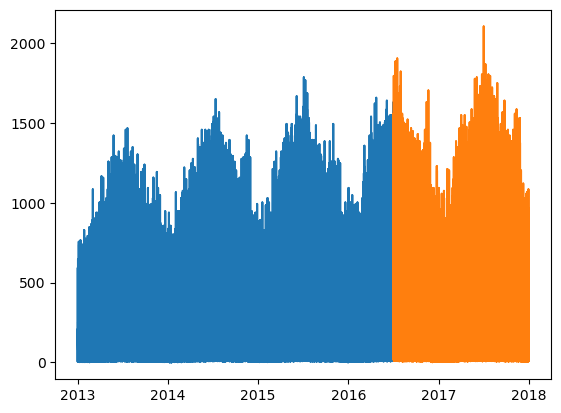

In [49]:
plt.plot(train.index, train['total_cost'])
plt.plot(test.index, test['total_cost'])

In [51]:
y = train.total_cost

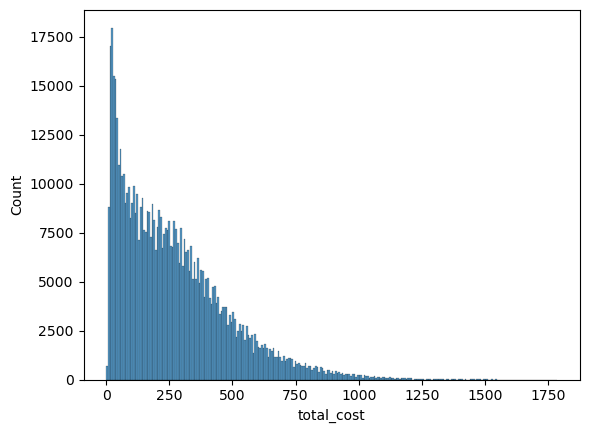

In [54]:
sns.histplot(y)
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


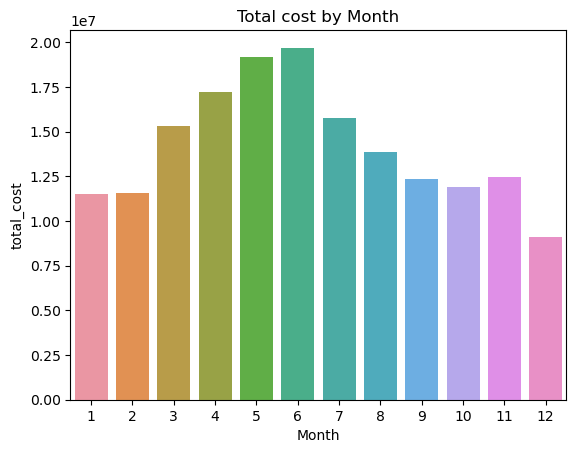

In [66]:
ax = y.groupby(y.index.month).sum()
sns.barplot(ax.index, ax)
plt.xticks(rotation=0)
plt.title('Total cost by Month')
plt.xlabel('Month') 
plt.ylabel=('cost')
#bar plot that shows total sales by month

In [61]:
ax

sale_date
1     185.232810
2     205.001723
3     246.694359
4     286.463913
5     308.932679
6     328.098415
7     334.285921
8     297.654839
9     274.558847
10    255.857997
11    277.170912
12    195.726292
Name: total_cost, dtype: float64

In [81]:
train = train.drop(columns = ['day_name'])
train['day_of_week'] = train.index.strftime('%A')


In [82]:
train

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,total_cost,day_of_week
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,218.40,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,125.55,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,453.60,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,294.00,Tuesday
...,...,...,...,...,...,...,...,...
2016-07-02,46,Easy-off,Easy-off Oven Cleaner Lemon Scent,9.54,12125 Alamo Ranch Pkwy,78253,438.84,Saturday
2016-07-02,39,Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,5.17,2118 Fredericksburg Rdj,78201,201.63,Saturday
2016-07-02,58,Moms Best Naturals,Moms Best Naturals Cereal Toasted Cinnamon Squ...,2.97,12125 Alamo Ranch Pkwy,78253,172.26,Saturday


In [91]:
x = train.groupby(train.day_of_week).sum()
x

,sale_amount,item_price,store_zipcode,total_cost
day_of_week,,,,
Friday,4784124,472176.60,7157569200,25716680.08
Monday,3565320,469596.40,7118456800,19172365.98
Saturday,5052377,470133.05,7126279624,27170965.25
Sunday,5351786,469596.40,7118456800,28770717.84
Thursday,4476245,472176.60,7157569200,24064242.91
Tuesday,4172066,472176.60,7157569200,22434552.57
Wednesday,4180091,472176.60,7157569200,22472448.50


In [103]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
train['day_of_week'] = train['day_of_week'].astype(cat_type)

In [105]:
df_weekday = train.groupby(['day_of_week']).sum().reindex(cats) 
df_weekday.head()

,sale_amount,item_price,store_zipcode,total_cost
day_of_week,,,,
Monday,3565320,469596.4,7118456800,19172365.98
Tuesday,4172066,472176.6,7157569200,22434552.57
Wednesday,4180091,472176.6,7157569200,22472448.50
Thursday,4476245,472176.6,7157569200,24064242.91
Friday,4784124,472176.6,7157569200,25716680.08


In [94]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='day_of_week', ylabel='total_cost'>

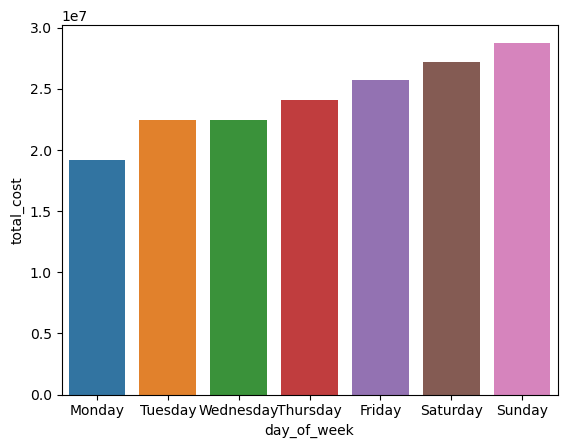

In [106]:
sns.barplot(df_weekday.index, df_weekday.total_cost)
# total_cost by day of week